In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [111]:
stores = pd.read_csv('stores.csv')
features = pd.read_csv('features.csv.zip')
df_train = pd.read_csv('train.csv.zip')
df_test = pd.read_csv('test.csv.zip')

In [112]:
stores.columns

Index(['Store', 'Type', 'Size'], dtype='object')

In [113]:
features.columns

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday'],
      dtype='object')

In [114]:
df_train.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday'], dtype='object')

In [115]:
df_train = df_train.merge(features, on=['Store', 'Date', 'IsHoliday'])

In [116]:
df_train = df_train.merge(stores, on='Store')

In [117]:
df_train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315


In [118]:
df_train.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
dtype: int64

In [119]:
df_train = df_train.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'], axis=1)

In [120]:
df_train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,211.096358,8.106,A,151315


In [121]:
df_train['Date'] = pd.to_datetime(df_train['Date'])

In [122]:
df_train['Month'] = df_train['Date'].dt.month
df_train['Week'] = df_train['Date'].dt.isocalendar().week
df_train['Day'] = df_train['Date'].dt.dayofyear
df_train['Year'] = df_train['Date'].dt.year

In [123]:
df_train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,Month,Week,Day,Year
0,1,1,2010-02-05,24924.50,False,42.31,2.572,211.096358,8.106,A,151315,2,5,36,2010
1,1,2,2010-02-05,50605.27,False,42.31,2.572,211.096358,8.106,A,151315,2,5,36,2010
2,1,3,2010-02-05,13740.12,False,42.31,2.572,211.096358,8.106,A,151315,2,5,36,2010
3,1,4,2010-02-05,39954.04,False,42.31,2.572,211.096358,8.106,A,151315,2,5,36,2010
4,1,5,2010-02-05,32229.38,False,42.31,2.572,211.096358,8.106,A,151315,2,5,36,2010


In [124]:
weekly_sales_2010 = df_train[df_train['Year']==2010].groupby('Week').sum()['Weekly_Sales']
weekly_sales_2011 = df_train[df_train['Year']==2011].groupby('Week').sum()['Weekly_Sales']
weekly_sales_2012 = df_train[df_train['Year']==2012].groupby('Week').sum()['Weekly_Sales']

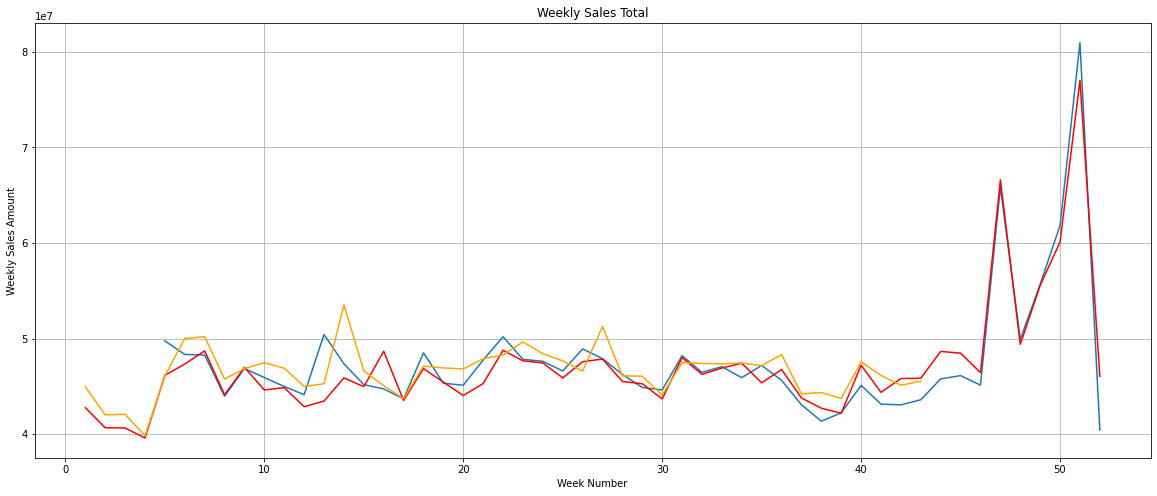

In [125]:
plt.figure(figsize=(20,8))
plt.plot(weekly_sales_2010)
plt.title('Weekly Sales Total')
plt.xlabel('Week Number')
plt.ylabel('Weekly Sales Amount')
plt.grid(True)
plt.plot(weekly_sales_2011, color='red')
plt.plot(weekly_sales_2012, color='orange');


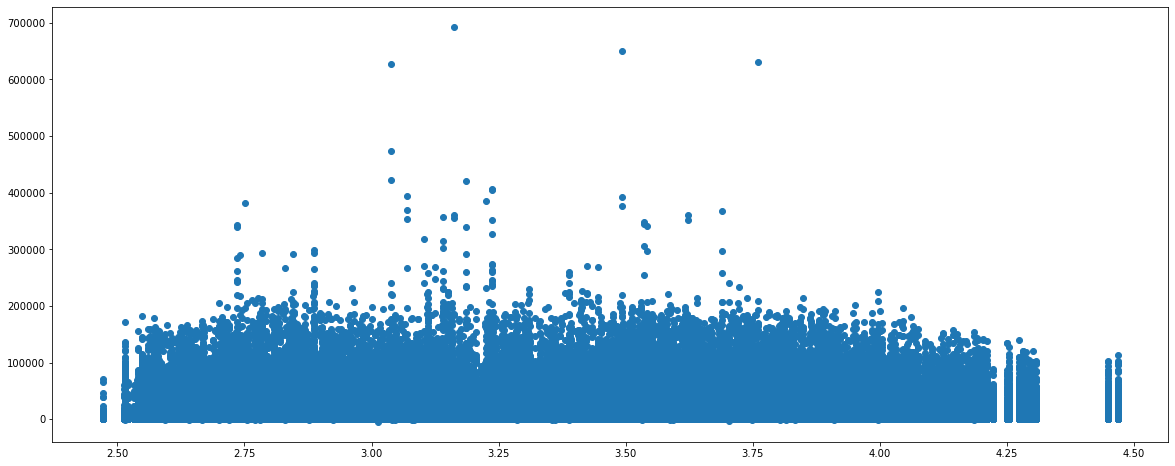

In [126]:
plt.figure(figsize=(20,8))
plt.scatter(df_train['Fuel_Price'], df_train['Weekly_Sales']);

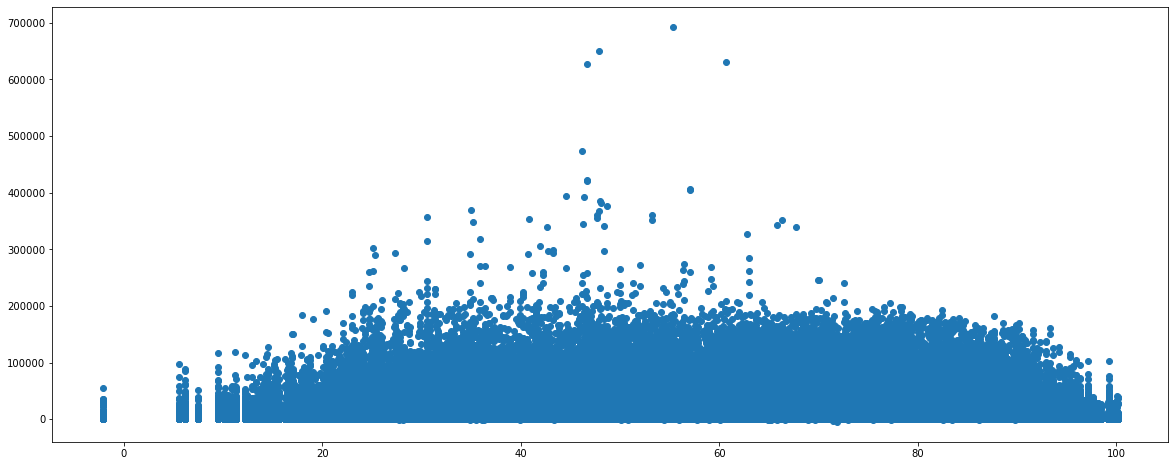

In [127]:
plt.figure(figsize=(20,8))
plt.scatter(df_train['Temperature'], df_train['Weekly_Sales']);

In [128]:
df_train.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Size,Month,Week,Day,Year
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,60.090059,3.361027,171.201947,7.960289,136727.915739,6.449510,25.826762,180.818742,2010.968591
std,12.785297,30.492054,22711.183519,18.447931,0.458515,39.159276,1.863296,60980.583328,3.243217,14.151887,99.211172,0.796876
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,126.064000,3.879000,34875.000000,1.000000,1.000000,6.000000,2010.000000
25%,11.000000,18.000000,2079.650000,46.680000,2.933000,132.022667,6.891000,93638.000000,4.000000,14.000000,97.000000,2010.000000
50%,22.000000,37.000000,7612.030000,62.090000,3.452000,182.318780,7.866000,140167.000000,6.000000,26.000000,181.000000,2011.000000
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,212.416993,8.572000,202505.000000,9.000000,38.000000,265.000000,2012.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,227.232807,14.313000,219622.000000,12.000000,52.000000,365.000000,2012.000000


In [129]:
df_train.corr()['Weekly_Sales'].sort_values()

Store          -0.085195
Unemployment   -0.025864
CPI            -0.020921
Year           -0.010111
Temperature    -0.002312
Fuel_Price     -0.000120
IsHoliday       0.012774
Week            0.027673
Day             0.027713
Month           0.028409
Dept            0.148032
Size            0.243828
Weekly_Sales    1.000000
Name: Weekly_Sales, dtype: float64

In [130]:
#plt.figure(figsize=(20,8))
#plt.bar(df_train['Store'], df_train['Weekly_Sales'])

In [131]:
df_train = df_train[['Store', 'Dept', 'Weekly_Sales', 'IsHoliday', 'Size', 'Week', 'Month', 'Year']]

In [132]:
df_X = df_train.drop('Weekly_Sales', axis=1)
df_y = df_train['Weekly_Sales']

In [133]:
df_X['IsHoliday'] = df_X['IsHoliday'].replace({True: 1, False:0})
df_X.head()

,Store,Dept,IsHoliday,Size,Week,Month,Year
0,1,1,0,151315,5,2,2010
1,1,2,0,151315,5,2,2010
2,1,3,0,151315,5,2,2010
3,1,4,0,151315,5,2,2010
4,1,5,0,151315,5,2,2010


In [134]:
X_train, X_dev, y_train, y_dev = train_test_split(df_X, df_y, test_size = 0.2, random_state=1)

In [137]:
def WMAE(df, y, y_pred):
    weights = df['IsHoliday'].apply(lambda x: 5 if x else 1)
    return np.round(np.sum(weights*abs(y-y_pred))/(np.sum(weights)), 2)

In [139]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_dev)

In [141]:
WMAE(X_dev, y_dev, y_pred)

1476.04

In [142]:
y_pred_train = rf_model.predict(X_train)
WMAE(X_train, y_train, y_pred_train)

550.28